### 코로나 배달 데이터
관악, 동작, 금천

#### 데이터 변수 명
SERIAL_NUMBER = 순번
PROCESS_DT = 처리일시
DLVR_RQESTER_ID = 배달요청업체 ID
DLVR_REQUST_STTUS_VALUE = 배달요청상태값 (1:완료, 2:취소, 3:사고, 4:문의)
DLVR_RCEPT_CMPNY_ID = 배달접수회사 ID
DLVR_STORE_ID = 배달상점ID
DLVR_STORE_INDUTY_NM = 배달상점 업종이름
DLVR_STORE_LEGALDONG_CODE = 배달상점 주소 법정동코드
DLVR_STORE_SIDO = 배달상점 주소 법정동 시도명
DLVR_STORE_SIGUNGU = 배달상점 주소 법정동 시군구명
DLVR_STORE_DONG = 배달상점 주소 법정동 읍면동명
DLVR_STORE_RI = 배달상점 주소 법정동 리명
DLVR_STORE_ADSTRD_CODE = 배달상점 주소 행정동 코드
DLVR_STORE_RDNMADR_CODE = 배달상점주소 도로명주소 코드
DLVR_DSTN_LEGALDONG_CODE = 배달목적지 주소 법정동코드
DLVR_DSTN_SIDO = 배달목적지 주소 법정동 시도명
DLVR_DSTN_SIGUNGU = 배달목적지 주소 법정동 시군구명
DLVR_DSTN_DONG = 배달목적지 주소 법정동 읍면동명
DLVR_DSTN_RI = 배달목적지 주소 법정동 리명
DLVR_DSTN_ADSTRD_CODE = 배달목적지 주소 행정동 코드
DLVR_DSTN_RDNMADR_CODE = 배달목적지주소 도로명주소 코드
DLVR_MAN_ID = 배달기사 ID
DLVR_AMOUNT = 배달비용
CALL_RLAY_FEE_AMOUNT = 호출중계수수료금액
GOODS_AMOUNT = 배달상품금액
SETLE_KND_VALUE = 결제종류번호 (1:카드, 2:선불, 3:현금)
SETLE_CARD_CN = 결제카드종류
DLVR_RCEPT_TIME = 배달접수시간
DLVR_CARALC_TIME = 배달배차시간
DLVR_COMPT_TIME = 배달완료시간
DLVR_CANCL_TIME = 배달취소시간

### 1. 데이터 불러오기

In [1]:
#모듈 불러오기
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('font', family='New Gulim')

In [2]:
#데이터 로드, 경로는 알아서!
delivery =pd.read_csv('C:/Users/juyeo/Desktop/store/KT_data_20200717/delivery.csv')

### 2. 데이터 결측값 처리, 필터링
결측값 0으로 설정, 0으로 해도 무리 없음

In [3]:
delivery = delivery.fillna('0')

In [5]:
#전체 데이터에서 서울특별시를 배달 목적지로 고르기
#서울에서 자기가 맡은 구 지정

#관악, 동작, 금천 중심 : 배달 목적지로 묶기
seoul = delivery['DLVR_DSTN_SIDO'] == '서울특별시'
seoul = delivery[seoul]

gch = seoul['DLVR_DSTN_SIGUNGU'] == '금천구'
gch = seoul[gch]

dj = seoul['DLVR_DSTN_SIGUNGU'] == '동작구'
dj = seoul[dj]

gw = seoul['DLVR_DSTN_SIGUNGU'] == '관악구'
gw = seoul[gw]

#### 2.1 배달 목적지 기준, 동으로 그룹화 해서 보기 (가장 주문이 많은 동 항목 탐색/ 사실 할 필요 없음 허헣)

In [8]:
#배달목적지를 기준,  동으로 그룹화해서 보기
#각자 구에서 배달 목
gch_1 = gch.groupby(['DLVR_DSTN_DONG'],as_index=False).count()         #독산동이 가장 많이 주문, 가산동이 가장 적게 주문
dj_1 = dj.groupby(['DLVR_DSTN_DONG'],as_index=False).count()           #사당동이 가장 많이 주문 동작동이 가장 적게 주문
gw_1 = gw.groupby(['DLVR_DSTN_DONG'],as_index=False).count()           #봉천동이 가장 많이 주문, 남현동이 가장 적게 주문


In [12]:
gch_1

,DLVR_DSTN_DONG,SERIAL_NUMBER,PROCESS_DT,DLVR_RQESTER_ID,DLVR_REQUST_STTUS_VALUE,DLVR_RCEPT_CMPNY_ID,DLVR_STORE_ID,DLVR_STORE_INDUTY_NM,DLVR_STORE_LEGALDONG_CODE,DLVR_STORE_SIDO,...,DLVR_MAN_ID,DLVR_AMOUNT,CALL_RLAY_FEE_AMOUNT,GOODS_AMOUNT,SETLE_KND_VALUE,SETLE_CARD_CN,DLVR_RCEPT_TIME,DLVR_CARALC_TIME,DLVR_COMPT_TIME,DLVR_CANCL_TIME
0,가산동,30201,30201,30201,30201,30201,30201,30201,30201,30201,...,30201,30201,30201,30201,30201,30201,30201,30201,30201,30201
1,독산동,58503,58503,58503,58503,58503,58503,58503,58503,58503,...,58503,58503,58503,58503,58503,58503,58503,58503,58503,58503
2,시흥동,47673,47673,47673,47673,47673,47673,47673,47673,47673,...,47673,47673,47673,47673,47673,47673,47673,47673,47673,47673


#### 2.2 배달 상점 업종별 주문 건수 보기 (카테고리 중 제일 많은 항목 찾기)

In [10]:
#배달 상점 업종별 주문 건수 보기
gch_ca = gch.groupby(['DLVR_STORE_INDUTY_NM'],as_index=False).count()  #분식, 치킨 순으로 가장 많음
dj_ca = dj.groupby(['DLVR_STORE_INDUTY_NM'],as_index=False).count()    #카페/디저트가 가장 많음
gw_ca = gw.groupby(['DLVR_STORE_INDUTY_NM'],as_index=False).count()    #카페/디저트가 가장 많음


In [13]:
#이런식으로 카운트한 개수가 나온다.
gch_ca

,DLVR_STORE_INDUTY_NM,SERIAL_NUMBER,PROCESS_DT,DLVR_RQESTER_ID,DLVR_REQUST_STTUS_VALUE,DLVR_RCEPT_CMPNY_ID,DLVR_STORE_ID,DLVR_STORE_LEGALDONG_CODE,DLVR_STORE_SIDO,DLVR_STORE_SIGUNGU,...,DLVR_MAN_ID,DLVR_AMOUNT,CALL_RLAY_FEE_AMOUNT,GOODS_AMOUNT,SETLE_KND_VALUE,SETLE_CARD_CN,DLVR_RCEPT_TIME,DLVR_CARALC_TIME,DLVR_COMPT_TIME,DLVR_CANCL_TIME
0,도시락,8,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8
1,돈까스/일식,1937,1937,1937,1937,1937,1937,1937,1937,1937,...,1937,1937,1937,1937,1937,1937,1937,1937,1937,1937
2,배달전문업체,1394,1394,1394,1394,1394,1394,1394,1394,1394,...,1394,1394,1394,1394,1394,1394,1394,1394,1394,1394
3,분식,31589,31589,31589,31589,31589,31589,31589,31589,31589,...,31589,31589,31589,31589,31589,31589,31589,31589,31589,31589
4,아시안/양식,4118,4118,4118,4118,4118,4118,4118,4118,4118,...,4118,4118,4118,4118,4118,4118,4118,4118,4118,4118
5,야식,13517,13517,13517,13517,13517,13517,13517,13517,13517,...,13517,13517,13517,13517,13517,13517,13517,13517,13517,13517
6,족발/보쌈,14386,14386,14386,14386,14386,14386,14386,14386,14386,...,14386,14386,14386,14386,14386,14386,14386,14386,14386,14386
7,중식,7474,7474,7474,7474,7474,7474,7474,7474,7474,...,7474,7474,7474,7474,7474,7474,7474,7474,7474,7474
8,찜탕,3433,3433,3433,3433,3433,3433,3433,3433,3433,...,3433,3433,3433,3433,3433,3433,3433,3433,3433,3433
9,치킨,29660,29660,29660,29660,29660,29660,29660,29660,29660,...,29660,29660,29660,29660,29660,29660,29660,29660,29660,29660


#### 2.3 지역구로 보기
본인 지역구에서 가장 많이 나온 카테고리의 세부사항 보기
기존 데이터에서 도착지(d)와 출발지(s)로 나눠서 저장 (구분!)
변수 이름은 알아서 저장해도 상관없음

In [6]:
#금천
#가장 많이 주문하는 업종으로 묶어서 배달하는 가게의 위치 보기
gch_bunsik = gch['DLVR_STORE_INDUTY_NM'] == '분식'
gch_bunsik = gch[gch_bunsik] # 총 31589

gch_bunsik_d = gch_bunsik.groupby(['DLVR_DSTN_DONG'],as_index=False).count() #시흥동이 제일 많고, 가산동 제일 적다

'''
배달목적지 
가산동 4810   독산동 8279    시흥동 18500
'''

gch_bunsik_s = gch_bunsik.groupby(['DLVR_STORE_DONG'],as_index=False).count() #시흥동이 제일 많고, 고척동이 제일 적다

'''
배달 상점
가산동  2789   고척동  2      구로동  905    독산동  5680        
소하동  67     시흥동  20769  일직동  39     철산동  333       
하안동  1005       
'''

'\n배달 상점\n가산동  2789   고척동  2      구로동  905    독산동  5680        \n소하동  67     시흥동  20769  일직동  39     철산동  333       \n하안동  1005       \n'

In [8]:
gch_bunsik_d

,DLVR_DSTN_DONG,SERIAL_NUMBER,PROCESS_DT,DLVR_RQESTER_ID,DLVR_REQUST_STTUS_VALUE,DLVR_RCEPT_CMPNY_ID,DLVR_STORE_ID,DLVR_STORE_INDUTY_NM,DLVR_STORE_LEGALDONG_CODE,DLVR_STORE_SIDO,...,DLVR_MAN_ID,DLVR_AMOUNT,CALL_RLAY_FEE_AMOUNT,GOODS_AMOUNT,SETLE_KND_VALUE,SETLE_CARD_CN,DLVR_RCEPT_TIME,DLVR_CARALC_TIME,DLVR_COMPT_TIME,DLVR_CANCL_TIME
0,가산동,4810,4810,4810,4810,4810,4810,4810,4810,4810,...,4810,4810,4810,4810,4810,4810,4810,4810,4810,4810
1,독산동,8279,8279,8279,8279,8279,8279,8279,8279,8279,...,8279,8279,8279,8279,8279,8279,8279,8279,8279,8279
2,시흥동,18500,18500,18500,18500,18500,18500,18500,18500,18500,...,18500,18500,18500,18500,18500,18500,18500,18500,18500,18500


In [9]:
gch_bunsik_s

,DLVR_STORE_DONG,SERIAL_NUMBER,PROCESS_DT,DLVR_RQESTER_ID,DLVR_REQUST_STTUS_VALUE,DLVR_RCEPT_CMPNY_ID,DLVR_STORE_ID,DLVR_STORE_INDUTY_NM,DLVR_STORE_LEGALDONG_CODE,DLVR_STORE_SIDO,...,DLVR_MAN_ID,DLVR_AMOUNT,CALL_RLAY_FEE_AMOUNT,GOODS_AMOUNT,SETLE_KND_VALUE,SETLE_CARD_CN,DLVR_RCEPT_TIME,DLVR_CARALC_TIME,DLVR_COMPT_TIME,DLVR_CANCL_TIME
0,가산동,2789,2789,2789,2789,2789,2789,2789,2789,2789,...,2789,2789,2789,2789,2789,2789,2789,2789,2789,2789
1,고척동,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
2,구로동,905,905,905,905,905,905,905,905,905,...,905,905,905,905,905,905,905,905,905,905
3,독산동,5680,5680,5680,5680,5680,5680,5680,5680,5680,...,5680,5680,5680,5680,5680,5680,5680,5680,5680,5680
4,소하동,67,67,67,67,67,67,67,67,67,...,67,67,67,67,67,67,67,67,67,67
5,시흥동,20769,20769,20769,20769,20769,20769,20769,20769,20769,...,20769,20769,20769,20769,20769,20769,20769,20769,20769,20769
6,일직동,39,39,39,39,39,39,39,39,39,...,39,39,39,39,39,39,39,39,39,39
7,철산동,333,333,333,333,333,333,333,333,333,...,333,333,333,333,333,333,333,333,333,333
8,하안동,1005,1005,1005,1005,1005,1005,1005,1005,1005,...,1005,1005,1005,1005,1005,1005,1005,1005,1005,1005


### 3. 그래프 그리기
그래프 제목 수정하기
sns.barplot 에서 data 부분 수정하기 나머지는 그대로!
어케해도 두개를 붙이는 방법을 모르겠닿...ㅎㅎ

[Text(0, 0, '가산동'), Text(1, 0, '독산동'), Text(2, 0, '시흥동')]

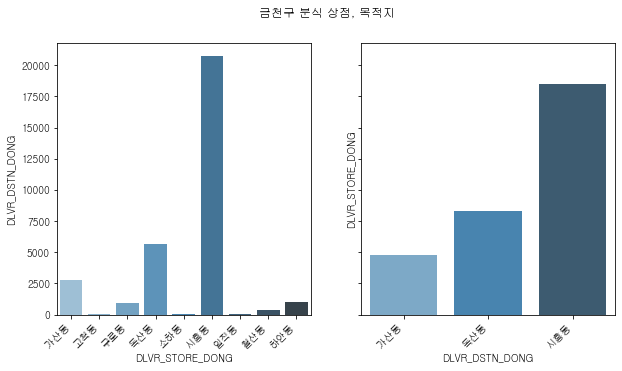

In [7]:
fig,axes = plt.subplots(1,2,sharey = True, figsize = (10,5))
fig.suptitle('금천구 분식 상점, 목적지')

sns.barplot(x ='DLVR_STORE_DONG' , y='DLVR_DSTN_DONG', data = gch_bunsik_s,orient= 'v' , ax=axes[0],palette="Blues_d") #출발
axes[0].set_xticklabels(gch_bunsik_s.DLVR_STORE_DONG.unique(),rotation=45, ha='right')

sns.barplot(x ='DLVR_DSTN_DONG' , y='DLVR_STORE_DONG', data = gch_bunsik_d,orient= 'v', ax=axes[1],palette="Blues_d")#목적지
axes[1].set_xticklabels(gch_bunsik_d.DLVR_DSTN_DONG.unique(),rotation=45, ha='right')


[Text(0, 0, '가산동'), Text(1, 0, '독산동'), Text(2, 0, '시흥동')]

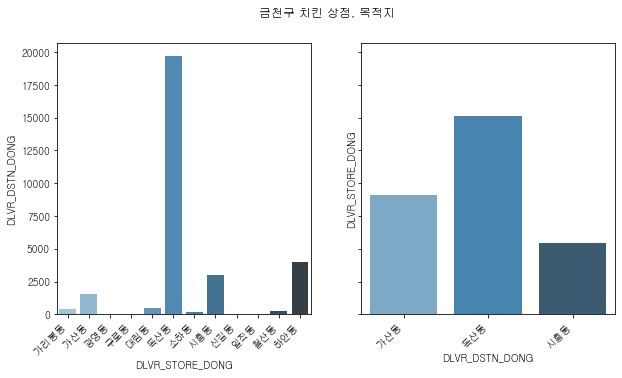

In [10]:
gch_chicken = gch['DLVR_STORE_INDUTY_NM'] == '치킨'
gch_chicken = gch[gch_chicken] # 총 29660

gch_chicken_d = gch_chicken.groupby(['DLVR_DSTN_DONG'],as_index=False).count() #독산동이 제일 많고, 시흥동 제일 적다

'''
배달목적지 주소 법정동 읍면동명 기준 (목적지)
가산동 9117   독산동 15113    시흥동 5430
'''

gch_chicken_s = gch_chicken.groupby(['DLVR_STORE_DONG'],as_index=False).count() #시흥동이 제일 많고, 고척동이 제일 적다

#배달 상점
'''
가리봉동 391   가산동  1559   광명동  13     구로동  27    
대림동  464    독산동  19736  소하동  184    시흥동  2980   
신길동  33     일직동  4      철산동  267    하안동  4002       
'''
#---------------------------------
fig,axes = plt.subplots(1,2,sharey = True, figsize = (10,5))
fig.suptitle('금천구 치킨 상점, 목적지')

sns.barplot(x ='DLVR_STORE_DONG' , y='DLVR_DSTN_DONG', data = gch_chicken_s,orient= 'v' , ax=axes[0],palette="Blues_d") #출발
axes[0].set_xticklabels(gch_chicken_s.DLVR_STORE_DONG.unique(),rotation=45, ha='right')

sns.barplot(x ='DLVR_DSTN_DONG' , y='DLVR_STORE_DONG', data = gch_chicken_d,orient= 'v', ax=axes[1],palette="Blues_d")#목적지
axes[1].set_xticklabels(gch_chicken_d.DLVR_DSTN_DONG.unique(),rotation=45, ha='right')


[Text(0, 0, '노량진동'),
 Text(1, 0, '대방동'),
 Text(2, 0, '동작동'),
 Text(3, 0, '본동'),
 Text(4, 0, '사당동'),
 Text(5, 0, '상도1동'),
 Text(6, 0, '상도동'),
 Text(7, 0, '신대방동'),
 Text(8, 0, '흑석동')]

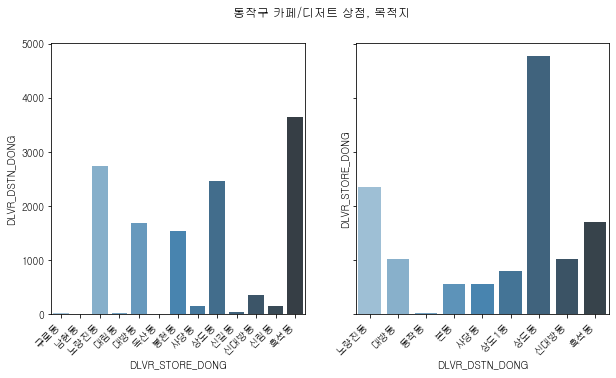

In [11]:
#동작
dj_cafe = dj['DLVR_STORE_INDUTY_NM'] == '카페/디저트'
dj_cafe = dj[dj_cafe] #총 12839

dj_cafe_d = dj_cafe.groupby(['DLVR_DSTN_DONG'],as_index=False).count() #상도동이 가장 많고 동작동이 가장 적다

#배달목적지 주소 법정동 읍면동명 기준 (목적지)
'''
노량진동    2348    대방동      1024     동작동      19      본동        567    
사당동      555     상도1동     809      상도동      4781    신대방동    1029
흑석동      1707
'''
dj_cafe_s = dj_cafe.groupby(['DLVR_STORE_DONG'],as_index=False).count() #흑석동이 가장 많고 독산동이 가장 적다

#배달 상점
'''
구로동      28      남현동      4     노량진동    2734    대림동      21   
대방동      1685    독산동      7     봉천동      1547    사당동      157      
상도동      2459    신길동      41    신대방동    367     신림동      149      
흑석동      3640   
'''
'--------------------------------------------------------'
fig,axes = plt.subplots(1,2,sharey = True, figsize = (10,5))
fig.suptitle('동작구 카페/디저트 상점, 목적지')

sns.barplot(x ='DLVR_STORE_DONG' , y='DLVR_DSTN_DONG', data = dj_cafe_s,orient= 'v' , ax=axes[0],palette="Blues_d") #출발
axes[0].set_xticklabels(dj_cafe_s.DLVR_STORE_DONG.unique(),rotation=45, ha='right')

sns.barplot(x ='DLVR_DSTN_DONG' , y='DLVR_STORE_DONG', data = dj_cafe_d,orient= 'v', ax=axes[1],palette="Blues_d")#목적지
axes[1].set_xticklabels(dj_cafe_d.DLVR_DSTN_DONG.unique(),rotation=45, ha='right')


[Text(0, 0, '남현동'), Text(1, 0, '봉천동'), Text(2, 0, '신림동')]

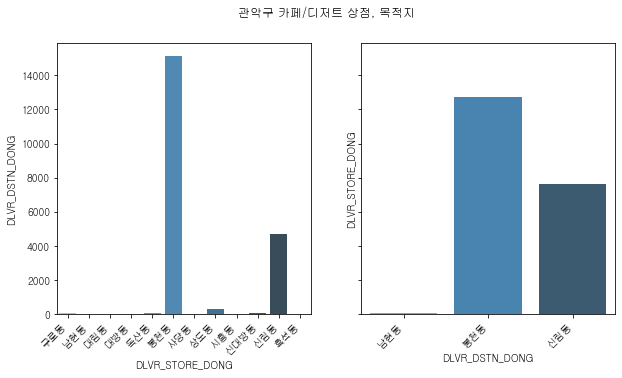

In [13]:
#관악
gw_cafe = gw['DLVR_STORE_INDUTY_NM'] == '카페/디저트'
gw_cafe = gw[gw_cafe] # 총 20409
gw_cafe_d = gw_cafe.groupby(['DLVR_DSTN_DONG'],as_index=False).count() #시흥동이 제일 많고, 가산동 제일 적다

'''
배달목적지 주소 법정동 읍면동명 기준 (목적지)
남현동 76     봉천동 12696   신림동   7637
'''

gw_cafe_s = gw_cafe.groupby(['DLVR_STORE_DONG'],as_index=False).count() #시흥동이 제일 많고, 고척동이 제일 적다

'''
배달 상점
구로동	63     남현동	8      대림동	20     대방동	1
독산동	98     봉천동	15146  사당동	3      상도동	306
시흥동	1      신대방동	75     신림동	4679   흑석동	9
'''
fig,axes = plt.subplots(1,2,sharey = True, figsize = (10,5))
fig.suptitle('관악구 카페/디저트 상점, 목적지')

sns.barplot(x ='DLVR_STORE_DONG' , y='DLVR_DSTN_DONG', data = gw_cafe_s,orient= 'v' , ax=axes[0],palette="Blues_d") #출발
axes[0].set_xticklabels(gw_cafe_s.DLVR_STORE_DONG.unique(),rotation=45, ha='right')

sns.barplot(x ='DLVR_DSTN_DONG' , y='DLVR_STORE_DONG', data = gw_cafe_d,orient= 'v', ax=axes[1],palette="Blues_d")#목적지
axes[1].set_xticklabels(gw_cafe_d.DLVR_DSTN_DONG.unique(),rotation=45, ha='right')
